In [1]:
import freya
import matplotlib
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.datasets import make_moons, make_circles 

In [2]:
import matplotlib
from sklearn.datasets import make_moons, make_circles 

In [3]:
plt.style.use("bmh")

## 1. Generate data

In [4]:
def generate_data(samples, shape_type='circles', noise=0.05):
    """Generates data.
    
    Generates and formats data using sklearn functionality.
    
    Parameters
    ----------
    samples : int
        The total number of points generated.
    shape_type : str, optional, default: 'circles'
        Whether to generate data with circular or lunar shape.
    noise : float, optional, default: 0.05
        Standard deviation of Gaussian noise added to the data.
        
    Returns
    -------
    data : pandas.DataFrame
        A pandas dataframe containing the data and the class
        of the generated samples.
    
    """
    if shape_type is 'moons':
        X, Y = make_moons(n_samples=samples, noise=noise)
    elif shape_type is 'circles':
        X, Y = make_circles(n_samples=samples, noise=noise)
    else:
        raise ValueError(f"The introduced shape {shape_type} is not valid. Please use 'moons' or 'circles' ")
    
    data = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
    
    return data

In [5]:
def plot_generated_data(data):
    """Plots generated data.
    
    Plots the given dataset. This function expects the dataset to have
    no more than 2 classes.
    
    Parameters
    ----------
    data : pandas.DataFrame
        A pandas dataframe containing the data and the class
        of the samples.
        
    Returns
    -------
    ax : matplotlib.AxesSubplot
        An axes subplot containing the plot.
        
    """
    ax = data.plot.scatter(x='x', y='y', figsize=(16,12), color=data['label'], 
                 cmap=matplotlib.colors.ListedColormap(['skyblue', 'salmon']), grid=True);
    
    return ax

d:\envs\machine_learning\lib\site-packages\pandas\plotting\_matplotlib\core.py:231: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used " "simultaneously. Using 'color'"


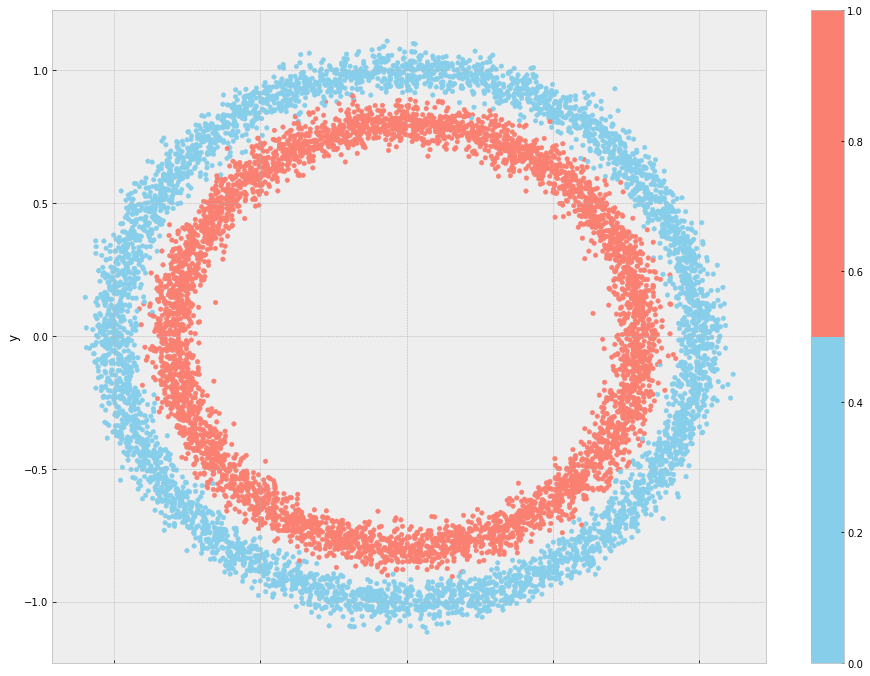

In [6]:
data = generate_data(samples=10000, shape_type='circles', noise=0.04)
plot_generated_data(data);

## 2. Create model

In [7]:
from freya.model import Model
from freya.layers import Linear, ReLU, Sigmoid
from freya.loss import BinaryCrossEntropy

In [8]:
model = Model()

In [9]:
model.add(Linear(2, 5))
model.add(ReLU(5))

model.add(Linear(5,2))
model.add(ReLU(2))

model.add(Linear(2,1))
model.add(Sigmoid(1))

In [10]:
X = data[['x', 'y']].values
Y = data['label'].T.values

## 3. Train the model

In [11]:
model.train(X_train = X.T, 
            Y_train = Y, 
            learning_rate = 0.05, 
            epochs=10000,
            loss_function = "BinaryCrossEntropy", 
            verbose=True)

Epoch: 0. Loss: 0.8756736395097201
Epoch: 50. Loss: 0.693094825338498
Epoch: 100. Loss: 0.6930044013012924
Epoch: 150. Loss: 0.6929182049306805
Epoch: 200. Loss: 0.6928355965237252
Epoch: 250. Loss: 0.6927559988356288
Epoch: 300. Loss: 0.6926788989194996
Epoch: 350. Loss: 0.6926038202665421
Epoch: 400. Loss: 0.6925303398943223
Epoch: 450. Loss: 0.6924580578612732
Epoch: 500. Loss: 0.6923866116580162
Epoch: 550. Loss: 0.6923156714879102
Epoch: 600. Loss: 0.6922449300830718
Epoch: 650. Loss: 0.6921741078465002
Epoch: 700. Loss: 0.6921029438563148
Epoch: 750. Loss: 0.6920311910120337
Epoch: 800. Loss: 0.6919586393099373
Epoch: 850. Loss: 0.6918850779362774
Epoch: 900. Loss: 0.691810321725711
Epoch: 950. Loss: 0.6917342281290848
Epoch: 1000. Loss: 0.6916566389880398
Epoch: 1050. Loss: 0.6915773975427479
Epoch: 1100. Loss: 0.6914963887302651
Epoch: 1150. Loss: 0.6914134777168227
Epoch: 1200. Loss: 0.6913285373313458
Epoch: 1250. Loss: 0.6912414351823218
Epoch: 1300. Loss: 0.6911520947299399

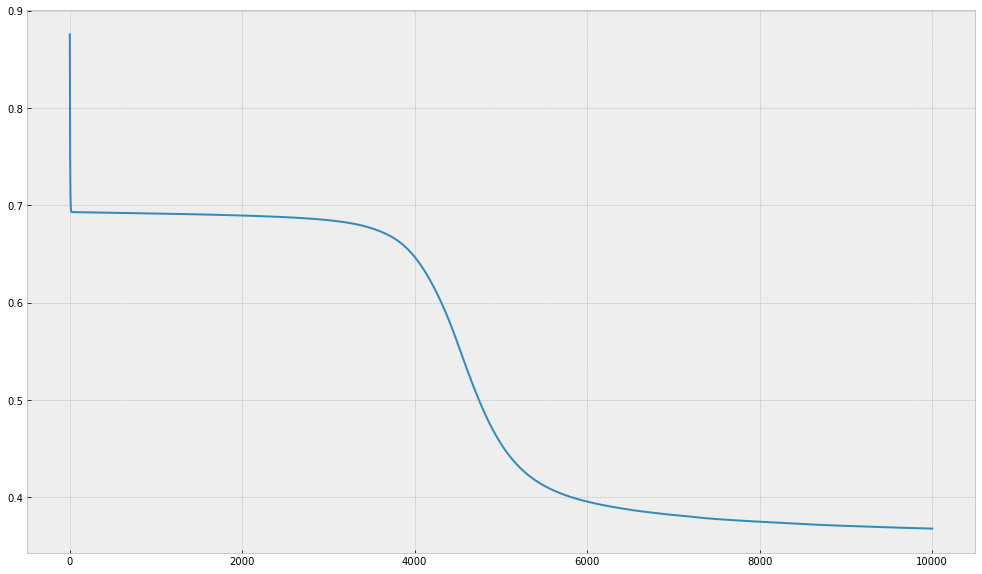

In [12]:
plt.figure(figsize=(17,10))
plt.plot(model.loss)

## 4. Test the model

In [13]:
from sklearn.metrics import roc_auc_score

In [14]:
predictions = model.predict(X.T).T

In [15]:
new_pred = []

for p in predictions:
    if p < 0.5:
        new_pred.append(0)
    else:
        new_pred.append(1)

In [16]:
roc_auc_score(y_true=Y, y_score=new_pred)

0.8276999999999999

## 5. Plot boundry

In [17]:
def plot_decision_boundry(X, Y, model, steps=1000, cmap='Paired'):
    """Plots decision boundry.
    
    Plots a decision boundry for the classes. It can only plot 2D
    data.
    
    Parameters
    ----------
    X : numpy.Array
    
    Original Code
    -------------
    https://rohitmidha23.github.io/Neural-Network-Decision-Boundary/
    
    """
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1 
    
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)
    
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()].T)
    z = labels.reshape(xx.shape)
    
    train_labels = model.predict(X.T)
    
    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, lw=0)
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.3)
    
    return fig, ax

(<Figure size 1080x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a106f28>)

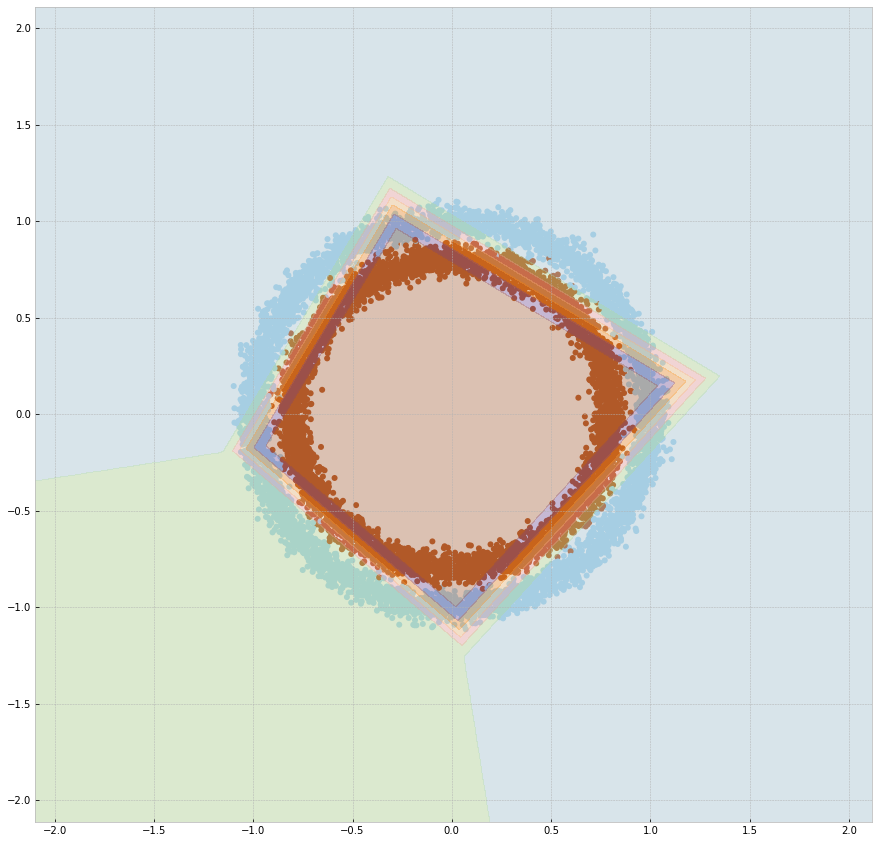

In [18]:
plot_decision_boundry(X, Y, model)

In [19]:
avg_acc = []

In [20]:
avg_acc.append(0.8720000000000001)
avg_acc.append(0.8261999999999999)
avg_acc.append(0.859)
avg_acc.append(0.8777999999999999)
avg_acc.append(0.7748)
avg_acc.append(0.8220000000000001)
avg_acc.append(0.7720000000000001)
avg_acc.append(0.5214)
avg_acc.append(0.8858)
avg_acc.append(0.85)

In [21]:
np.array(avg_acc).mean()

0.8061